# Introduction

The following documented is meant to show the kind of questions you are going to find in your assignments and how they should be answered. You will find some questions from a previous year first assignment, regarding pseudo-random numbers.
Assignments will be in the form of python notebooks such as Jupyter Notebook. They will require, beside statistical knowledge, a basic understanding of programming and of the python language. An easy way to set up your Python version, manage packages, etc.. is to download the  [Anaconda distribution](https://www.anaconda.com/products/individual)(click to open). Jupyter notebooks can be found there too.
    
Here you will find pieces of text giving some context and a question building up on that, similarly to what you will find in your assignments. In this case you are also provided answers so that you can understand what makes an answer well enough, redundantly or partly answered. When answers are in form of  pieces of codes, you are generally meant to write your own code unless explicitly indicated that you may use some library such as numpy, pandas, etc.. . As a general indication to answer the questions, try to include the minimal correct content needed to precisely answer what you are asked, as more exhaustive answers can be both time consuming and redundant for your grade.

Also for the first time you have to implement a given function, say to compute the mean of a list of samples, you are required to write your own code for the first use of such a function. After the first use you are allowed to use a built-in function, packages, etc...

# Questions

\subsection{Question 1}



 

\textbf{Text}: Before we can generate 'random' datasets we need to have a random number generator (RNG). This is a very crucial piece of underlying technology that you will rely on very often, both for data analysis as well as for modeling and simulation. It is important to have a basic understanding of how a computer generates random numbers. It can never generate perfectly random numbers; all hardware inside a computer or laptop is completely deterministic.
However there are algorithms to get as close as possible. 

To help you get a feel for what a computer does 'under the hood' you will now program your own random number generator and test that it works as expected.Computers generate the next 'random' integer number based on a calculation on the previously generated integer number. Simply put, computers should do this as 'chaotically' as possible, i.e., a small change of the previous number should make a potentially big difference in the next number being generated. Also, the entire range of numbers should be eventually covered with equal frequency.

Make a function randint(a, c, m) which returns a new random integer in the range 0,...,$2^{32}−1$ every time you call it. Make use of one global variable seed and make sure that your function can change its value. The easiest technique is the [Linear Congruential generator](https://www.wikiwand.com/en/Linear_congruential_generator) but you may also try a different technique (in which case the arguments to the function may be different). Find suitable parameter values for a,c,m online. If they fail your validation test (below) then choose different values.

\textbf{Answer} 

In [1]:
seed = 160

def randint(a=1664525, c=1013904223, m=2**32):
    global seed
    seed=(a*seed+c)%m
    return(seed)

\textbf{Comments}: The question asks for a piece of code that does the job, so noadditional information about the underlying mathematics involved is needed. Sometimes the text includes some links to some external knowledge source or some hints helping you answer.

## Question 2

\textbf{Text}: Make a function rand() which returns a new random real number (float) in the range [0,1) every time you call it.


\textbf{Answer} 

In [2]:
def randfloat():
    random_integer=randint()
    return (random_integer/2**32)

\textbf{Comments}: Comments: A denominator different than $2^{32}$ would result in a covered range different than [0,1] and would make the answer incorrect.

## Question 3

\textbf{Text}   Test whether your RNG works properly. Make a histogram of  $n=10^6$  random real numbers and using  $k=50$  bins. Label your axes and give the figure a brief but explanatory caption. Show the histogram and make sure that the deviations of bin heights are visible.

Note : Import the matplotlib.pyplot package by executing import matplotlib.pyplot as plt and then use its plt.hist(data, numbins) function.

\textbf{Answer}

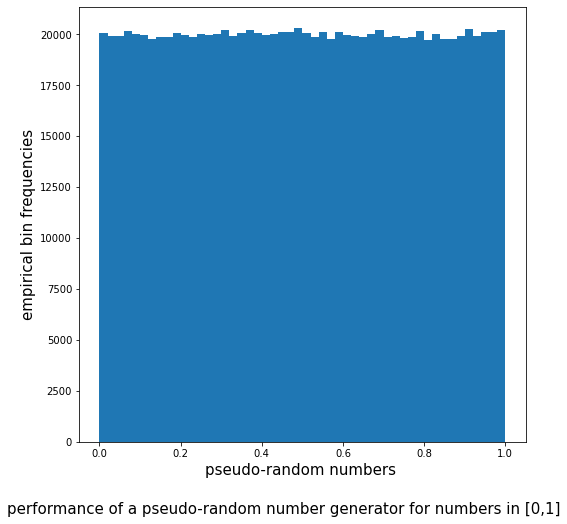

In [3]:
import matplotlib.pyplot as plt

seed, k, n = 160, 50, 10**6
sample= [randfloat() for i in range(n)]
figure=plt.figure(figsize=(8,8))
plt.xlabel('pseudo-random numbers ', fontsize=15)
plt.ylabel('empirical bin frequencies', fontsize=15)
plt.figtext(0.,0, 'performance of a pseudo-random number generator for numbers in [0,1]', fontsize=15)
plt.hist(sample, k)
plt.show()

\textbf{Comments}: If the plot lacks axis labels or the explanatory caption it would be considered an incomplete answer, since these were explicitly asked.

# Question 4

\textbf{Text}: For any given  $n$  and  $k$ we expect that the bin height of each individual bin follows one and the same particular type of distribution, assuming that your RNG is indeed truly uniformly distributed. Please provide the name this probability distribution for an individual bin height and specify its parameters in terms of  $n$ and  $k$.

Hint: the uniform distribution of the RNG does not imply a uniform distribution of a bin's height.

\textbf{Answer}:  

The probability distribution for the height of each bin is a binomial distribution $B(n,p)$, with parameters: 

-n = number of trials = $10^6$; 

-p = probability of success = $\frac{1}{k}$ = $\frac{1}{50}$


\textbf{Comments}: The answer gives exactly what is asked for: the name of the distribution and how its parameters are defined in terms of $n$ and $k$, nothing more nothing less. For instance writing down the functional form of the binomial distribution would be not wrong, but unnecessary. Explaining why this is the correct distribution (a series of repeated Bernoulli trials, for which a combinatorial factor is to be considered) would be correct but redundant as well. 

# \textbf{Question 5}

\textbf{Text}: What is the expected mean and the standard deviation for each bin's height that corresponds with this theoretical distribution? Specify the two analytical expressions.



\textbf{Answer}: 

The mean of the distribution is : $n p= \frac{10^6}{50}=2* 10^4$

The standard deviation is : $ \sqrt{np(1-p)}=140$

\textbf{Comments}: Showing the explicit computations is not answered, only the correct expressions and numbers are required.

# \textbf{Question 6}

\textbf{Text}: Use the return values from the histogram function you used to obtain the list of bin heights in the figure. Are these (experimentally obtained) mean and standard deviation indeed 'close' (let's say it deviates no more than  20\% ) to our theoretical predictions?

Note: Don't confuse this with a statistical notion of closeness to the parameter, or with a confidence level. These notions will be introduced later. Instead, in this question you should determine whether or not the estimates are more than  20\%  larger than or smaller than the theoretical values.

\textbf{Answer} 

In [6]:
def my_mean(samples):
    #estimate the mean of a sample
    s=0
    for i in range(len(samples)):
        s+=samples[i]
    return(s/len(samples))

def my_std_dv(samples):
    #estimate the standard deviation of a sample
    mean=my_mean(samples)
    s=0
    for i in range(len(samples)):
        s+=(samples[i]-mean)**2
    return((s/len(samples))**0.5)

def percentage_deviation(a,b):
    #compute the percentage deviation of 2 numbers, taking the the first input as the reference
    if(b>a):
        return((b-a)/a*100)
    else:
          
        return((a-b)/a*100)

k=50
p=1./k
theoretical_mean = n*p
theoretical_std_dv = (n*p*(1-p))**0.5

seed, num_bins, n = 160, 50, 10**6
sample= [randfloat() for i in range(n)]
bin_heights=plt.hist(sample, k)[0]
plt.close() #not to show the histogram plot
empirical_mean=my_mean(bin_heights)
empirical_std_dv=my_std_dv(bin_heights)
percentage_deviation_mean=percentage_deviation(theoretical_mean, empirical_mean)
percentage_deviation_std_dv=percentage_deviation(theoretical_std_dv, empirical_std_dv)

print('theoretical mean {}; empirical mean {}; percentage difference {} %'.format(theoretical_mean, empirical_mean, percentage_deviation_mean))
print('theoretical std dv {}; empirical std dv {}; percentage difference {} %'.format(theoretical_std_dv, empirical_std_dv, percentage_deviation_std_dv))
print('Both the empirical mean and standard deviations are within  a 20 % error from the theoretical values')

theoretical mean 20000.0; empirical mean 20000.0; percentage difference 0.0 %
theoretical std dv 140.0; empirical std dv 140.96964212198313; percentage difference 0.6926015157022343 %
Both the empirical mean and standard deviations are within  a 20 % error from the theoretical values


\textbf{Comments}:
Reporting the experimental values without the percentage difference would be considered as incorrect/incomplete as the question clarifies that such a measure is needed. 

Note: Here we necessarily obtain a perfect match between empirical and theoretical distribution, right? If we had repeated the same experiment multiple times for a single bin we 'd have obtained a more realistic non-null error.

# \textbf{Question 7}

\textbf{Text}: 
For relatively large  $n$ the above-mentioned distribution becomes closely approximated by another type of distribution, why?. What is the name of this distribution and what are the expressions for its mean and standard deviation? 

\textbf{Answer} 

for large $n$ the Central Limit Theorem holds, meaning that in this case the Binomial $B(n, p)$ gets approximated by a Gaussian Distribution $\mathcal{N}(\mu, \sigma)$, whose parameters are exactly the same as the binomial distribution: 

- $\mu=n*p$

- $\sigma=\sqrt{np(1-p)}$

\textbf{Comments}: Again the most concise and precise answer is the best. No need to explain in details when the CLT applies and what its statement is 

# Question 8


Perform another test of (uniform) randomness of your own choosing, show and explain its result with either in one figure or a very small table (and caption), and conclude whether your RNG passes the test or not. You may either think of your own or look up one of the common tests. Common tests are integer generator tests, including the birthday test, periodicity least significant bit, spectral test, and many others. The test must be your own implementation, not 'off-the-shelf'.

\textbf{Answer} 

Here we chose the bithday test, which consists in replicating the plot in the [link](https://en.wikipedia.org/wiki/Birthday_problem)

In [7]:
def random_birthday():
    random_integer=randint()
    return (int(random_integer*365/2**32)+1) #returns an integeer between 1 and 365

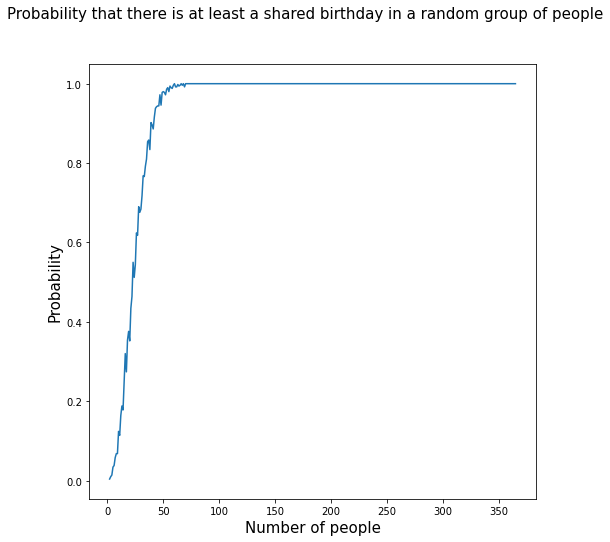

In [8]:
num_simulations=500
probs=[]
for i in range(2,366): #loop over people
    counter=0 # to keep track of successes
    for n in range(num_simulations):
        sample=[random_birthday() for j in range(i)]
        #print(sample)
        if(len(set(sample))<len(sample)): 
            counter+=1.
    probs.append(counter/num_simulations) #probability=num_of_successes/num_of_trials


plt.figure(figsize=(8,8))
plt.plot(range(2,366), probs)
plt.suptitle('Probability that there is at least a shared birthday in a random group of people', fontsize=15)
plt.xlabel('Number of people', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()